In [40]:
import requests
import urllib.parse
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [66]:
predict_url = "https://mlzoomcampfunctionapprhj.azurewebsites.net/api/predict"  # cloud
#predict_url = "http://localhost:7071/api/predict"  # local, before cloud deployment

In [67]:
test_imgs = [
    {   "name":"Quokka",
        "url":"https://fotos.perfil.com/2020/02/26/trim/1140/641/quokka-02262020-919630.jpg"
    },
    {   "name":"Zebra",
        "url":"https://www.trvst.world/wp-content/uploads/2023/06/zebra-on-grass-field.jpg"
    },
    {   "name":"Bat",
        "url":"https://site-547756.mozfiles.com/files/547756/medium/Bat.jpg"
    },
    {   "name":"Fennec Fox",
        "url":"https://media.wired.com/photos/593261cab8eb31692072f129/master/w_1600,c_limit/85120553.jpg"
    },
    {   "name":"Wild Dog",
        "url":"https://www.fauna-flora.org/wp-content/uploads/2023/05/Thomas-Retterath-iStock-1323457138-scaled-1.jpg"
    },
    {   "name":"Lizzard",
        "url":"https://www.mypetsname.com/wp-content/uploads/2019/04/Lizard-Names-Feature.jpg"
    }
]


Predicting for  {'name': 'Quokka', 'url': 'https://fotos.perfil.com/2020/02/26/trim/1140/641/quokka-02262020-919630.jpg'}  ...
(rat, 0.31526198983192444)

Predicting for  {'name': 'Zebra', 'url': 'https://www.trvst.world/wp-content/uploads/2023/06/zebra-on-grass-field.jpg'}  ...
(zebra, 0.9991171956062317)

Predicting for  {'name': 'Bat', 'url': 'https://site-547756.mozfiles.com/files/547756/medium/Bat.jpg'}  ...
(bat, 0.9995355606079102)

Predicting for  {'name': 'Fennec Fox', 'url': 'https://media.wired.com/photos/593261cab8eb31692072f129/master/w_1600,c_limit/85120553.jpg'}  ...
(fox, 0.5116718411445618)

Predicting for  {'name': 'Wild Dog', 'url': 'https://www.fauna-flora.org/wp-content/uploads/2023/05/Thomas-Retterath-iStock-1323457138-scaled-1.jpg'}  ...
(hyena, 0.8440786600112915)

Predicting for  {'name': 'Lizzard', 'url': 'https://www.mypetsname.com/wp-content/uploads/2019/04/Lizard-Names-Feature.jpg'}  ...
(lizard, 0.9989417195320129)


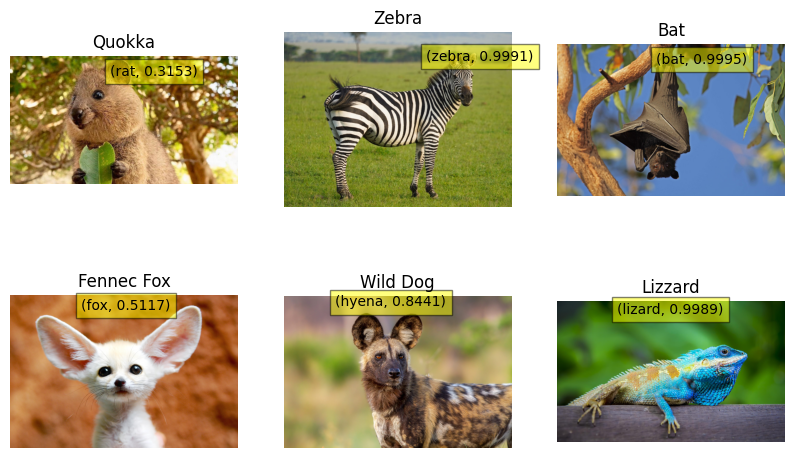

In [65]:
# img description
plt.figure(figsize=(10,6))
for i,img_path in enumerate(test_imgs):
    img= Image.open(requests.get(img_path["url"], stream=True).raw)
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title(img_path["name"])
    plt.axis('off')

    print("\nPredicting for ", img_path, " ...")
    # encode url
    params = {"img": img_path["url"]}
    encoded_params = urllib.parse.urlencode(params)
    # request prediction
    response = requests.post(predict_url, params = encoded_params).json()
    predicted_class = response["class_label"]
    predicted_proba = response["class_probability"]
    print(f"({predicted_class}, {predicted_proba})")
    plt.text(500,100,f"({predicted_class}, {predicted_proba:.4f})",bbox=dict(facecolor='yellow', alpha=0.5))
    
plt.show()

In [ ]:
img_ulr = "C:\Users\RobertoHernándezJimé\OneDrive - Ventagium Data Consulting\Continuous Improvement\AI\ML Zoomcamp\P02\capstone01\TEST\streamlit\bat2.jpg"
